# Halo Mass Function Calculation

In this notebook we will calculate the halo mass function, 
$$ f(\sigma) = \frac{M}{\rho_o} \frac{dn(M)}{d \ln (\sigma^{-1}(M))} $$ 
as well as the halo number density function,
$$  \frac{dn}{dM} = \frac{\rho_o}{M}\frac{d\ln \sigma^{-1}(M)}{dM} f(\sigma) $$
for comparison with the constraints obtained from halo graphs with mass (cut) and clustering information.

In [1]:
from hmf import MassFunction     # The main hmf class
import matplotlib.pyplot as plt  # The necessary plotting library
import numpy as np               # Numerical array library

In [13]:
θ_fid = np.array([0.3175, 0.834 ])
mf = MassFunction(z = 0.0,                  # Redshift of 1.0
                  cosmo_params={"Om0":0.3}, # Matter density of 0.3
                  hmf_model="PS")

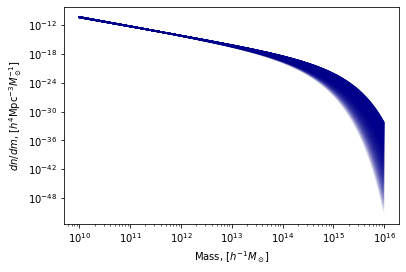

In [24]:
# bigger mass range
mf2 = MassFunction(Mmin=10,
                  Mmax=16,
                  hmf_model="PS") # Press-Schechter HMF

# visualize change e.g. over redshift
for z in np.linspace(0,1,100):
    mf2.update(z=z, sigma_8=0.7)
    plt.plot(mf2.m, mf2.dndm,color="darkblue",alpha=1-z)

plt.xscale('log')
plt.yscale('log')

plt.xlabel(r"Mass, $[h^{-1}M_\odot]$")
plt.ylabel(r"$dn/dm$, $[h^{4}{\rm Mpc}^{-3}M_\odot^{-1}]$");

### mass index wehere m > Mcut: 518

In [25]:
masscut = 1.5e15
masscut_index = np.argmin(np.abs(mf2.m - masscut)) # 518
print(masscut_index)

518


# calculate contour plot

In [10]:
lo = [0.18, 0.65]
hi = [0.48, 0.98]

In [14]:
num = 20
s8s = np.arange(-num, num)*((lo[1] - hi[1])) # + θ_fid[1]
#s8s -= (len(s8s)/2) 
s8s /= len(s8s)
s8s += θ_fid[1]

oms = np.arange(-num, num)*((lo[0] - hi[0]))
oms /= len(oms)
oms += θ_fid[0]

How does HMF change in $\sigma_8$ ?

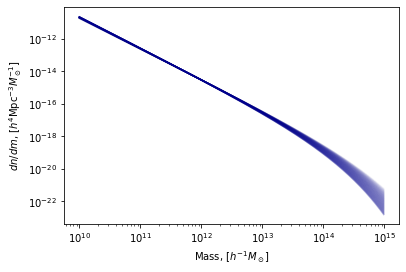

In [28]:
dndms_s8 = []

for s in s8s:
    mf.update(z=0, sigma_8=s)
    plt.plot(mf.m,mf.dndm,color="darkblue",alpha=1-s)
    dndms_s8.append(mf.dndm[-2])
    
plt.xscale('log')
plt.yscale('log')

plt.xlabel(r"Mass, $[h^{-1}M_\odot]$")
plt.ylabel(r"$dn/dm$, $[h^{4}{\rm Mpc}^{-3}M_\odot^{-1}]$");

In $\Omega_m$ ?

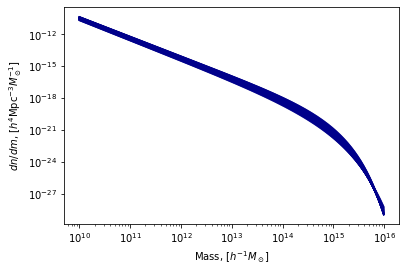

In [30]:
dndms_om = []
for o in oms:
    mf2.update(z=0, cosmo_params={"Om0":o}, sigma_8=θ_fid[1])
    plt.plot(mf2.m,mf2.dndm,color="darkblue",alpha=1-o)
    dndms_om.append(mf2.dndm[-2])
    
plt.xscale('log')
plt.yscale('log')

plt.xlabel(r"Mass, $[h^{-1}M_\odot]$")
plt.ylabel(r"$dn/dm$, $[h^{4}{\rm Mpc}^{-3}M_\odot^{-1}]$");

## evaluate over grid for HMF contours in $\Omega_m, \sigma_8$

In [31]:
x,y = np.meshgrid(oms[::1], s8s[::1])
x.shape

(40, 40)

In [19]:
x,y = np.meshgrid(oms[::1], s8s[::1])


mf2 = MassFunction(Mmin=10,
                  Mmax=16,
                  hmf_model="PS")

dndms2 = []
fsigmas2 = []
int_fsigmas_end2 = []
int_dndms2 = []
int_dndms_end2 = []

for _oms,_s8s in zip(x.ravel(), y.ravel()):
    mf2.update(z=0, cosmo_params={"Om0":_oms}, sigma_8=_s8s)
    dndms2.append(mf2.dndm[masscut_index])
    fsigmas2.append(mf2.fsigma[masscut_index])
    int_dndms2.append(np.sum(mf2.dndm[:masscut_index])) 
    int_dndms_end2.append(np.sum(mf2.dndm[masscut_index:]))     # integration from M_cut
    int_fsigmas_end2.append(np.sum(mf2.fsigma[masscut_index:])) # integration from M_cut

In [20]:
dndms2 = np.array(dndms2).reshape(x.shape)
fsigmas2 = np.array(fsigmas2).reshape(x.shape)
int_dndms2 = np.array(int_dndms2).reshape(x.shape)
int_dndms_end2 = np.array(int_dndms_end2).reshape(x.shape)
int_fsigmas_end2 = np.array(int_fsigmas_end2).reshape(x.shape)

In [501]:
dndms.shape

(40, 40)

In [719]:
np.save('dndms2', dndms2)
np.save('fsigmas2', fsigmas2)
np.save('int_dndms2', int_dndms2)
np.save('int_dndms_end2', int_dndms_end2)
np.save('int_fsigmas_end2', int_fsigmas_end2)
np.save('x', x)
np.save('y', y)

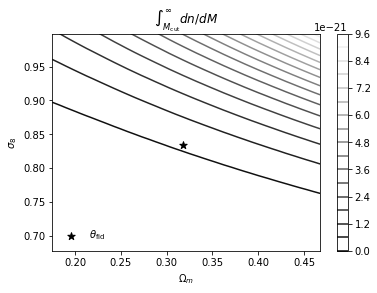

In [47]:
im = plt.contour(x, y, int_dndms_end2, levels=17, cmap='gray')
plt.scatter(*θ_fid, marker='*', label=r'$\theta_{\rm fid}$',c='k', s=60)
plt.colorbar(im)
plt.xlabel('$\Omega_m$')
plt.ylabel('$\sigma_8$')
plt.title(r'$\int_{M_{\rm cut}}^\infty dn/dM$')
plt.legend(framealpha=0., loc='lower left')
plt.show()

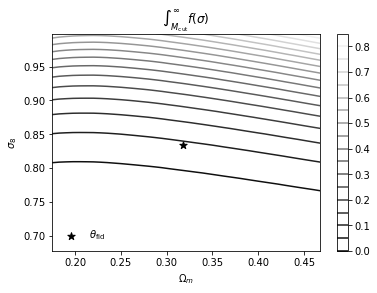

In [48]:
im = plt.contour(x, y, int_fsigmas_end2, levels=17, cmap='gray')
plt.scatter(*θ_fid, marker='*', label=r'$\theta_{\rm fid}$',c='k', s=60)
plt.colorbar(im)
plt.xlabel('$\Omega_m$')
plt.ylabel('$\sigma_8$')
plt.title(r'$\int_{M_{\rm cut}}^\infty f(\sigma)$')
plt.legend(framealpha=0., loc='lower left')
plt.show()